<a href="https://colab.research.google.com/github/yellowzijian/Math5670_Final_Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this project, we focus on building a financial trading portfolios. Financial trading is the buying and selling of financial assets, also called financial securities. People trade a variety of financial instruments, including equities: shares of stocks representing ownership of companies, bonds: debt instruments issued by the government or corporations, forex or foreign exchange market of currencies, commodities such as gold, silver, and oil, and cryptocurrencies like Bitcoin. However, in our case, our target assets are the stock in the US market. 


  People trade to make a profit by taking calculated risks. A trader makes a profit when buying a security at a lower price and selling later at a higher price, known as going long. Conversely, they may sell a (borrowed) security at a higher price and buy it back at a lower price, known as going short. As a retail trader, we focus on the long side.

  Trading typically has a shorter holding period, ranging from days to months. Investing has a longer time horizon, ranging up to years or even decades. Trading focuses on short-term market trends and tries to profit from volatility and price fluctuations. 

  Portfolios are a bundle of individual stocks with different weights for each position. The return of a portfolio is a linear combination of the weights and returns of each position. We are using discrete returns instead of log returns.


##1. Stock Screener
Firstly, we try to build up the stock screener by conducting the sentiment analysis with the some most popular finance communities in reddit.

We generated the data.py file and import it as a module. Basically, we define all the stock ticker that we want to research. The other important thing is new words. It is a  dictionary where the keywords that are used to qualify a sentiment towards a stock and the value tell us how bullish it is.

There is some pre-define parameters. First we define which subreddit we want to research, in our case, we involved wallstreetbets, stocks and investing. They are all large finance communities on Reddit. Then we are going to filter certain posts that have this flare, such as Daily Discussion, Weekend Discussion and Discussion. We decided to pick top 500 hottest posts for thoes communities. In order to guarantee the quality of the posts, we filter the ones with only upvote ratio greater than 70%. For the comments within the posts, they also need to have a minimum number of  upvotes which is 2. It was defined that 25 most mentioned tickers should be generated in order to perform the sentiment analysis and we choosed top 15 to do the sentiment analysis.


In [ ]:
#@title
pip install praw

In [ ]:
#@title 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
%matplotlib notebook
%matplotlib inline

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#@title 
your_module = drive.CreateFile({'id':'1fPeJLNSEBVjeYMRz0F1186I3DvqdkMne'})

In [ ]:
#@title 
your_module.GetContentFile('data.py')

In [ ]:
#@title 
pip install squarify

In [ ]:
#@title 
pip install emoji
pip install nltk

import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')

It took 207.39 seconds to analyze 11289 comments in 179 posts in 3 subreddits.

Posts analyzed saved in titles

25 most mentioned tickers: 
AAPL: 58
GME: 53
TSLA: 51
NVDA: 30
MSFT: 30
AMD: 26
CHWY: 26
BABA: 18
PE: 18
PYPL: 16
PLTR: 16
DKNG: 10
FB: 9
AMZN: 9
F: 9
NET: 9
SQ: 9
INTC: 8
AI: 8
DOCU: 8
TV: 7
SE: 7
T: 7
X: 6
DIS: 6

Sentiment analysis of top 15 picks:
     Bearish Neutral Bullish Total/Compound
AAPL   0.125   0.695   0.689         -0.007
GME    0.147   0.718   0.559         -0.028
TSLA   0.079   0.680   0.729          0.030
NVDA   0.081   0.700   0.399          0.032
MSFT   0.034   0.738   0.487          0.030
AMD    0.054   0.793   0.515          0.043
CHWY   0.222   0.597   0.672         -0.048
BABA   0.082   0.744   0.544          0.015
PE     0.054   0.793   0.243          0.033
PYPL   0.033   0.646   0.738          0.030
PLTR   0.084   0.524   0.849          0.020
DKNG   0.051   0.654   0.875          0.002
FB     0.031   0.476   1.030          0.048
AMZN   0.016   0.511

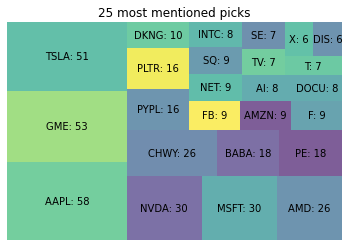

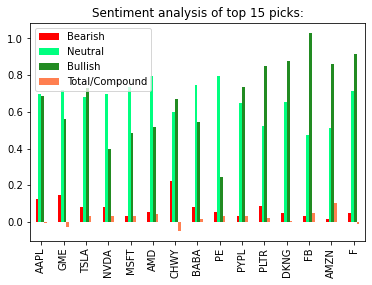

In [ ]:
#@title 
'''*****************************************************************************
Purpose: To analyze the sentiments of the reddit
This program uses Vader SentimentIntensityAnalyzer to calculate the ticker compound value. 
You can change multiple parameters to suit your needs. See below under "set program parameters."
Implementation:
We are using sets for 'x in s' comparison, sets time complexity for "x in s" is O(1) compare to list: O(n).
Limitations:
It depends mainly on the defined parameters for current implementation:
It completely ignores the heavily downvoted comments, and there can be a time when
the most mentioned ticker is heavily downvoted, but you can change that in upvotes variable.
-------------------------------------------------------------------
****************************************************************************'''

import praw
from data import *
import time
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import emoji    # removes emojis
import re   # removes links
import en_core_web_sm
import string


def data_extractor(reddit):
    '''extracts all the data from reddit
    Parameter: reddt: reddit obj
    Return:    posts, c_analyzed, tickers, titles, a_comments, picks, subs, picks_ayz
                
                posts: int: # of posts analyzed
                 c_analyzed: int: # of comments analyzed
                 tickers: dict: all the tickers found
                titles: list: list of the title of posts analyzed 
                 a_comments: dict: all the comments to analyze
                 picks: int: top picks to analyze
                 subs: int: # of subreddits analyzed
                picks_ayz: int: top picks to analyze
    
    '''
    
    '''############################################################################'''


    # set the program parameters
    subs = ['wallstreetbets', 'stocks', 'investing']     # sub-reddit to search
    post_flairs = {'Daily Discussion', 'Weekend Discussion', 'Discussion'}    # posts flairs to search || None flair is automatically considered
    goodAuth = {'AutoModerator'}   # authors whom comments are allowed more than once
    uniqueCmt = True                # allow one comment per author per symbol
    ignoreAuthP = {'example'}       # authors to ignore for posts 
    ignoreAuthC = {'example'}       # authors to ignore for comment 
    upvoteRatio = 0.70         # upvote ratio for post to be considered, 0.70 = 70%
    ups = 20       # define # of upvotes, post is considered if upvotes exceed this #
    limit = 1     # define the limit, comments 'replace more' limit
    upvotes = 2     # define # of upvotes, comment is considered if upvotes exceed this #
    picks = 25     # define # of picks here, prints as "Top ## picks are:"
    picks_ayz = 15   # define # of picks for sentiment analysis
    '''############################################################################'''     
    
    posts, count, c_analyzed, tickers, titles, a_comments = 0, 0, 0, {}, [], {}
    cmt_auth = {}
    
    for sub in subs:
        subreddit = reddit.subreddit(sub)
        hot_python = subreddit.hot(limit=500)    # sorting posts by hot
        # Extracting comments, symbols from subreddit
        for submission in hot_python:
            flair = submission.link_flair_text 
            author = submission.author.name
            
            # checking: post upvote ratio # of upvotes, post flair, and author 
            if submission.upvote_ratio >= upvoteRatio and submission.ups > ups and (flair in post_flairs or flair is None) and author not in ignoreAuthP:   
                submission.comment_sort = 'new'     
                comments = submission.comments
                titles.append(submission.title)
                posts += 1
                try: 
                    submission.comments.replace_more(limit=limit)   
                    for comment in comments:
                        # try except for deleted account?
                        try: auth = comment.author.name
                        except: pass
                        c_analyzed += 1
                        
                        # checking: comment upvotes and author
                        if comment.score > upvotes and auth not in ignoreAuthC:      
                            split = comment.body.split(" ")
                            for word in split:
                                word = word.replace("$", "")        
                                # upper = ticker, length of ticker <= 5, excluded words,                     
                                if word.isupper() and len(word) <= 5 and word not in blacklist and word in us:
                                    
                                    # unique comments, try/except for key errors
                                    if uniqueCmt and auth not in goodAuth:
                                        try: 
                                            if auth in cmt_auth[word]: break
                                        except: pass
                                        
                                    # counting tickers
                                    if word in tickers:
                                        tickers[word] += 1
                                        a_comments[word].append(comment.body)
                                        cmt_auth[word].append(auth)
                                        count += 1
                                    else:                               
                                        tickers[word] = 1
                                        cmt_auth[word] = [auth]
                                        a_comments[word] = [comment.body]
                                        count += 1   
                except Exception as e: print(e)
                
                           
    return posts, c_analyzed, tickers, titles, a_comments, picks, subs, picks_ayz


def print_helper(tickers, picks, c_analyzed, posts, subs, titles, time, start_time):
    '''prints out top tickers, and most mentioned tickers
    
    Parameter:   tickers: dict: all the tickers found
                 picks: int: top picks to analyze
                 c_analyzed: int: # of comments analyzed
                 posts: int: # of posts analyzed
                 subs: int: # of subreddits analyzed
                titles: list: list of the title of posts analyzed 
                 time: time obj: top picks to analyze
                start_time: time obj: prog start time
    Return: symbols: dict: dict of sorted tickers based on mentions
            times: list: include # of time top tickers is mentioned
            top: list: list of top tickers
    '''    

    # sorts the dictionary
    symbols = dict(sorted(tickers.items(), key=lambda item: item[1], reverse = True))
    top_picks = list(symbols.keys())[0:picks]
    time = (time.time() - start_time)
    
    # print top picks
    print("It took {t:.2f} seconds to analyze {c} comments in {p} posts in {s} subreddits.\n".format(t=time, c=c_analyzed, p=posts, s=len(subs)))
    print("Posts analyzed saved in titles")
    #for i in titles: print(i)  # prints the title of the posts analyzed
    
    
    print(f"\n{picks} most mentioned tickers: ")
    times = []
    top = []
    for i in top_picks:
        print(f"{i}: {symbols[i]}")
        times.append(symbols[i])
        top.append(f"{i}: {symbols[i]}")
   
    return symbols, times, top
    
    
def sentiment_analysis(picks_ayz, a_comments, symbols):
    '''analyzes sentiment anaylsis of top tickers
    
    Parameter:   picks_ayz: int: top picks to analyze
                 a_comments: dict: all the comments to analyze
                 symbols: dict: dict of sorted tickers based on mentions
    Return:      scores: dictionary: dictionary of all the sentiment analysis
    '''
    scores = {}
     
    vader = SentimentIntensityAnalyzer()
    vader.lexicon.update(new_words)     # adding custom words from data.py 
    picks_sentiment = list(symbols.keys())[0:picks_ayz]
    
    for symbol in picks_sentiment:
        stock_comments = a_comments[symbol]
        for cmnt in stock_comments:
    
            emojiless = emoji.get_emoji_regexp().sub(u'', cmnt) # remove emojis
            
            # remove punctuation
            text_punc  = "".join([char for char in emojiless if char not in string.punctuation])
            text_punc = re.sub('[0-9]+', '', text_punc)
                
            # tokenizeing and cleaning 
            tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
            tokenized_string = tokenizer.tokenize(text_punc)
            lower_tokenized = [word.lower() for word in tokenized_string] # convert to lower case
            
            # remove stop words
            nlp = en_core_web_sm.load()
            stopwords = nlp.Defaults.stop_words
            sw_removed = [word for word in lower_tokenized if not word in stopwords]
            
            # normalize the words using lematization
            lemmatizer = WordNetLemmatizer()
            lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in sw_removed])
            
            # calculating sentiment of every word in comments n combining them
            score_cmnt = {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
            
            word_count = 0
            for word in lemmatized_tokens:
                if word.upper() not in us:
                    score = vader.polarity_scores(word)
                    word_count += 1
                    for key, _ in score.items():
                        score_cmnt[key] += score[key]    
                else:
                    score_cmnt['pos'] = 2.0               
                    
            # calculating avg.
            try:        # handles: ZeroDivisionError: float division by zero
                for key in score_cmnt:
                    score_cmnt[key] = score_cmnt[key] / word_count
            except: pass
                
            
            # adding score the the specific symbol
            if symbol in scores:
                for key, _ in score_cmnt.items():
                    scores[symbol][key] += score_cmnt[key]
            else:
                scores[symbol] = score_cmnt        
    
        # calculating avg.
        for key in score_cmnt:
            scores[symbol][key] = scores[symbol][key] / symbols[symbol]
            scores[symbol][key]  = "{pol:.3f}".format(pol=scores[symbol][key])
            
    return scores


def visualization(picks_ayz, scores, picks, times, top):
    '''prints sentiment analysis
       makes a most mentioned picks chart
       makes a chart of sentiment analysis of top picks
       
    Parameter:   picks_ayz: int: top picks to analyze
                 scores: dictionary: dictionary of all the sentiment analysis
                 picks: int: most mentioned picks
                times: list: include # of time top tickers is mentioned
                top: list: list of top tickers
    Return:       None
    '''
    
    # printing sentiment analysis 
    print(f"\nSentiment analysis of top {picks_ayz} picks:")
    df = pd.DataFrame(scores)
    df.index = ['Bearish', 'Neutral', 'Bullish', 'Total/Compound']
    df = df.T
    print(df)
    
    # Date Visualization
    # most mentioned picks    
    squarify.plot(sizes=times, label=top, alpha=.7 )
    plt.axis('off')
    plt.title(f"{picks} most mentioned picks")
    #plt.show()
    
    # Sentiment analysis
    df = df.astype(float)
    colors = ['red', 'springgreen', 'forestgreen', 'coral']
    df.plot(kind = 'bar', color=colors, title=f"Sentiment analysis of top {picks_ayz} picks:")
    
    
    #plt.show()

def main():
    '''main function
    Parameter:   None
    Return:       None
    '''
    start_time = time.time()
    
    # reddit client
    reddit = praw.Reddit(user_agent="Comment Extraction",
                         client_id="",
                         client_secret="",
                         username="yellowzijian",
                         password="password", check_for_async=False)

    posts, c_analyzed, tickers, titles, a_comments, picks, subs, picks_ayz = data_extractor(reddit)
    symbols, times, top = print_helper(tickers, picks, c_analyzed, posts, subs, titles, time, start_time)
    scores = sentiment_analysis(picks_ayz, a_comments, symbols)
    visualization(picks_ayz, scores, picks, times, top)
    
if __name__ == '__main__':
    main()

Based on the first table, it showed 25 most mentioned tickers. We expected to build a portfolio based on thoes stocks. However, there are too many stocks and some of them may turn out to short. So the score could help us further filter the stocks. Once we considered the compound score, thoes with negative scores should be ignored. Moreover, PE is a kind of special assets. So it should be also exclued from our final portfolio. Thus, our portfolio included TSLA, NVDA, MSFT, AMD, BABA, PYPL, PLTR, DKNG, FB and AMZN. Thoes 10 stock seems to be ideal invest target for the short term.

## 2. Portfolio Investing

Financial returns are generally derived from stock prices, and are expressed as percentages in decimal form. There are two common types of financial returns: discrete returns (also called simple returns), and log returns (also called continuous returns). In our project, we used mostly discrete returns at the daily frequency. Log returns are used for some advanced formulas and financial models in finance.

There is a very simple formula to calculate simple returns, which is simply today's price minus yesterday's price, divided by yesterday's price. This gives you a percentage gain or loss for the day.
$$R_{t_2}=\frac{P_{t_2}-P_{t_1}}{P_{t_1}}$$

For log returns, what is important to understand though is that log returns aggregate across time, while discrete returns aggregate across assets. Since you are building portfolios with multiple assets, discrete returns make the most sense to our project.
$$Rl=ln(\frac{P_{t_2}}{P_{t_1}})=ln(P_{t_2})-ln(P_{t_1})$$

Harry Markowitz came up with Efficient Frontier Optimization in 1952, which provides a solid framework for combining stocks in a portfolio. The key insight is that by combining assets with different expected returns and volatilities, one can decide on a mathematically optimal allocation.

Mean-variance optimization problem
$$\min w'\Sigma w$$
with constraints
\begin{align*}
& \mu' w\geq \mu_{target}\\
& \omega' w=1 \\
& w\geq \eta=[0,0,\dots,0]'
\end{align*}

The Efficient Frontier Optimization is a constrained optimization problem, in which you try to minimize portfolio variance by setting the weights. The top line is in fact the portfolio variance. It's weights transposed, times the covariance matrix sigma, times the weights again. The "subject to" conditions simply state that the expected return, or weights times mu, should be at least some target level of return. Then, it says that the weights should some up to 1, and that at least some of the weights should be positive.

In [ ]:
pip install yfinance

stocks = ['TSLA', 'NVDA', 'MSFT', 'AMD', 'BABA', 'PYPL', 'PLTR', 'DKNG', 'FB', 'AMZN']

# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

#Interval required 1 minute
data = yf.download(tickers=stocks, period='1y', interval='1d')

[*********************100%***********************]  10 of 10 completed


In [ ]:
stock_prices = data['Adj Close']
stock_returns = data['Adj Close'].pct_change().dropna()

In [ ]:
pip install PyPortfolioOpt

# Import the packages 
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt.efficient_frontier import EfficientFrontier


# Calculate expected returns mu 
mu = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
# ef.add_objective(objective_functions.L2_reg, gamma=2)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()
print (cleaned_weights_maxsharpe)

OrderedDict([('AMD', 0.0), ('AMZN', 0.0), ('BABA', 0.0), ('DKNG', 0.0), ('FB', 0.0), ('MSFT', 0.66455), ('NVDA', 0.33545), ('PLTR', 0.0), ('PYPL', 0.0), ('TSLA', 0.0)])


In [ ]:
# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
# ef.add_objective(objective_functions.L2_reg, gamma=2)

# Calculate weights for the minimum volatility portfolio
raw_weights_minvol = ef.min_volatility()
cleaned_weights_minvol = ef.clean_weights()

# Show portfolio performance
print(cleaned_weights_minvol)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.0), ('AMZN', 0.23225), ('BABA', 0.09389), ('DKNG', 0.0152), ('FB', 0.07271), ('MSFT', 0.58116), ('NVDA', 0.0), ('PLTR', 0.0048), ('PYPL', 0.0), ('TSLA', 0.0)])
Expected annual return: 28.9%
Annual volatility: 18.8%
Sharpe Ratio: 1.43


(0.2889498996430218, 0.18807784926213458, 1.4299924244038507)

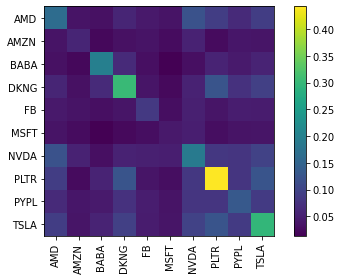

In [69]:
plotting.plot_covariance(Sigma)

In [ ]:
# from pypfopt import objective_functions

# # Obtain the efficient frontier
# ef = EfficientFrontier(mu, Sigma)
# # ef.add_objective(objective_functions.L2_reg, gamma=2)

# # Calculate weights for the minimum volatility portfolio
# raw_weights_maxqu = ef.max_quadratic_utility(risk_aversion=1)
# cleaned_weights_maxqu = ef.clean_weights()

# # Show portfolio performance
# print(cleaned_weights_maxqu)
# print(raw_weights_maxqu)
# ef.portfolio_performance(verbose=True)

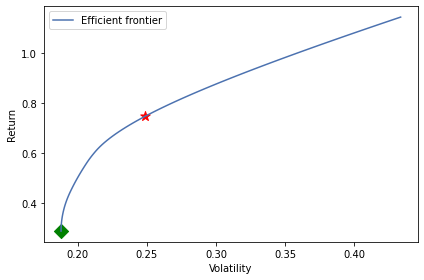

In [ ]:
from matplotlib import pyplot as plt
from pypfopt import plotting
# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
# ef.add_objective(objective_functions.L2_reg, gamma=2)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
# ef.add_objective(objective_functions.L2_reg, gamma=2)
# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
# ef.add_objective(objective_functions.L2_reg, gamma=2)
# Find the tangency portfolio
ef.min_volatility()
ret_min, std_min, _ = ef.portfolio_performance()
ax.scatter(std_min, ret_min, marker="D", s=100, c="g", label="Min Volatility")


When we change the target return in the optimization problem, the weights w that form the optimal solution, change. So in fact, the solution to the Markowitz' optimization problem, is a collection of portfolios, which we call the efficient frontier. The line in the graph represents that frontier. The efficient frontier is thus the set of optimal portfolios that offers lowest risk for a given level of expected return and visa versa.

μ and σ are normally calculated by the returns. The red star represent the point on the efficient frontier with the max sharpe ratio. On the other hand, the green diamond represent the point on the efficient frontier with min volatillity. Moreover, we could check the performance for each cases. 

In [ ]:
from pypfopt import risk_models

# Define exponentially weightedSigma and mu using stock_prices
Sigma_ew = risk_models.exp_cov(stock_prices, span=180, frequency=252)
mu_ew = expected_returns.ema_historical_return(stock_prices, frequency=252, span=180)

# Calculate the efficient frontier
ef = EfficientFrontier(mu_ew, Sigma_ew)

# Calculate weights for the min volatility
raw_weights_minvol = ef.min_volatility()
cleaned_weights_minvol = ef.clean_weights()

# Show portfolio performance 
print(cleaned_weights_maxsharpe)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.0), ('AMZN', 0.0), ('BABA', 0.0), ('DKNG', 0.0), ('FB', 0.0), ('MSFT', 0.34813), ('NVDA', 0.58744), ('PLTR', 0.0), ('PYPL', 0.0), ('TSLA', 0.06443)])
Expected annual return: 20.5%
Annual volatility: 18.0%
Sharpe Ratio: 1.02


(0.20487410456733524, 0.18041289589070392, 1.0247277704545799)

In [ ]:
# Calculate the efficient frontier
ef = EfficientFrontier(mu_ew, Sigma_ew)

# Calculate weights for the maximum sharpe ratio optimization
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()

# Show portfolio performance 
print(cleaned_weights_maxsharpe)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.0), ('AMZN', 0.0), ('BABA', 0.0), ('DKNG', 0.0), ('FB', 0.0), ('MSFT', 0.34813), ('NVDA', 0.58744), ('PLTR', 0.0), ('PYPL', 0.0), ('TSLA', 0.06443)])
Expected annual return: 121.2%
Annual volatility: 33.6%
Sharpe Ratio: 3.55


(1.212410100612259, 0.33588055023743674, 3.5501016649202652)

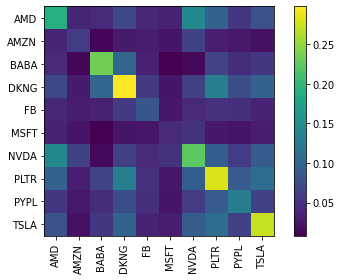

In [70]:
plotting.plot_covariance(Sigma_ew)

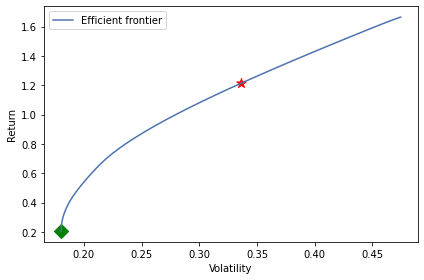

In [ ]:
# Obtain the efficient frontier
ef = EfficientFrontier(mu_ew, Sigma_ew)
# ef.add_objective(objective_functions.L2_reg, gamma=2)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Obtain the efficient frontier
ef = EfficientFrontier(mu_ew, Sigma_ew)
# ef.add_objective(objective_functions.L2_reg, gamma=2)
# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Obtain the efficient frontier
ef = EfficientFrontier(mu_ew, Sigma_ew)
# ef.add_objective(objective_functions.L2_reg, gamma=2)
# Find the tangency portfolio
ef.min_volatility()
ret_min, std_min, _ = ef.portfolio_performance()
ax.scatter(std_min, ret_min, marker="D", s=100, c="g", label="Min Volatility")


μ and σ are normally calculated by the returns. The red star represent the point on the efficient frontier with the max sharpe ratio. On the other hand, the green diamond represent the point on the efficient frontier with min volatillity. Moreover, we could check the performance for each cases. 

Efficient frontier optimization requires knowledge of the expected risk Sigma and expected returns mu. In practice, these are rather difficult to know with any certainty. The best we can do is to come up with estimates, for example by extrapolating historical data. But that is where we go wrong. If history would repeat itself perfectly, we would all be able to predict financial markets and stock movements. The truth is, the mean historic returns, or the historic portfolio variance are not perfect inputs and do not reflect future expected risk and return perfectly. Hence the resulting weights of our optimization problem, would have worked well in the past, but we have no guarantee that it will work well in the future.

We need to think about better measures for expected risk and return. A possible improvement is to use exponentially weighted risk and return. It assigns more importance to the most recent data, and thus aims to improve the estimates. 

We can do the same for volatility. The exponential covariance matrix also gives more weight to recent data when calculating covariance, in the same way that the exponential moving average is calculated. 

The efficient frontier is calculated by exponential weighted μ and σ. The red star represent the point on the efficient frontier with the max sharpe ratio. On the other hand, the green diamond represent the point on the efficient frontier with min volatillity. Moreover, we could also check the performance for each cases.



In [ ]:
Sigma_semi = risk_models.semicovariance(stock_prices, benchmark=0, frequency=252)

# Calculate the efficient frontier
ef = EfficientFrontier(mu_ew, Sigma_semi)

# Calculate weights for the min volatility
raw_weights_minvol = ef.min_volatility()
cleaned_weights_minvol = ef.clean_weights()

# Show portfolio performance 
print(cleaned_weights_maxsharpe)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.0), ('AMZN', 0.0), ('BABA', 0.0), ('DKNG', 0.0), ('FB', 0.0), ('MSFT', 0.34813), ('NVDA', 0.58744), ('PLTR', 0.0), ('PYPL', 0.0), ('TSLA', 0.06443)])
Expected annual return: 45.1%
Annual volatility: 12.9%
Sharpe Ratio: 3.34


(0.450880679635861, 0.12894441416886743, 3.3416001958144035)

In [ ]:
# Calculate the efficient frontier
ef = EfficientFrontier(mu_ew, Sigma_semi)

# Calculate weights for the maximum sharpe ratio optimization
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()

# Show portfolio performance 
print(cleaned_weights_maxsharpe)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.0), ('AMZN', 0.0), ('BABA', 0.0), ('DKNG', 0.0), ('FB', 0.0), ('MSFT', 0.0), ('NVDA', 1.0), ('PLTR', 0.0), ('PYPL', 0.0), ('TSLA', 0.0)])
Expected annual return: 166.5%
Annual volatility: 26.4%
Sharpe Ratio: 6.23


(1.6652800652751758, 0.2639356848082463, 6.233640087245115)

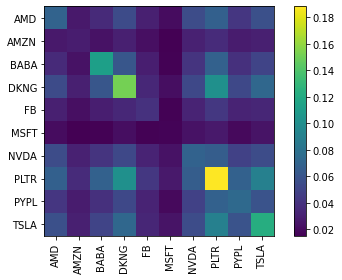

In [71]:
plotting.plot_covariance(Sigma_semi)

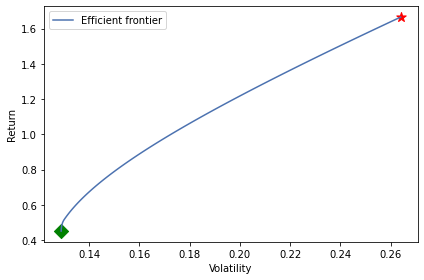

In [ ]:
# Obtain the efficient frontier
ef = EfficientFrontier(mu_ew, Sigma_semi)
# ef.add_objective(objective_functions.L2_reg, gamma=2)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Obtain the efficient frontier
ef = EfficientFrontier(mu_ew, Sigma_semi)
# ef.add_objective(objective_functions.L2_reg, gamma=2)
# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Obtain the efficient frontier
ef = EfficientFrontier(mu_ew, Sigma_semi)
# ef.add_objective(objective_functions.L2_reg, gamma=2)
# Find the tangency portfolio
ef.min_volatility()
ret_min, std_min, _ = ef.portfolio_performance()
ax.scatter(std_min, ret_min, marker="D", s=100, c="g", label="Min Volatility")

When we use measures such as standard deviation and variance for volatility, it measures all deviations from the mean, so both upside and downside deviations. However, investors typically more focus on the downside in their portfolios. They do however worry about negative returns. That suggests that a good risk measure should perhaps focus on the potential losses, rather than overall fluctuations measured by volatility.

That's where the Sortino ratio comes in. The Sortino ratio is a variation of the Sharpe ratio. It differentiates harmful volatility from overall volatility by using the asset's standard deviation of negative portfolio returns only. So instead of the normal standard deviation, in the Sortino ratio you calculate the standard deviation of the negative returns only, called downside risk.
$$\text{Sortino Ratio}=\frac{R_p-R_f}{\sigma_d}$$
where the denominator is the standard deviation of the downside. For that ratio you calculated the variance of the negative returns only, as a way to measure downside risk. Here we use the semicovariance matrix for the portfolio optimization problem.

So, the max sharpe ratio will lead to max sortino ratio instead. This time the max sortino ratio method just choose the NVDA as our only choice. It seems really aggressive trading strategy.


## 3. Backtesting

Backtesting is a way to assess the effectiveness of a strategy by testing it on historical data. The test result is evaluated to determine how it would have performed if used in the past, and whether it will be viable for further trading.

There are four steps to define and backtest a strategy. First we obtain historical price data of the assets we are going to trade. Second we define the strategy. Next we backtest the strategy with the historical data, and finally we evaluate the result.

First, we download the "Adjusted Close" prices from Yahoo Finance by all choosen stocks from '2021-6-14' to '2021-12-14'. The "Adjusted Close" price is adjusted for events like corporate actions such as stock splits, dividends, etc. Moreover, it is also the price we use before.

The "Strategy" contains trading logics by combining various "algos". It allows us to easily create strategies by mixing and matching different algos, each of which acts like a small task force that performs a specific operation. Within "Strategy" we first assign a name. Then we define a list of algos in the square brackets. The first "algo" specifies when to execute trades. Here we specify a simple rule to execute trades every week using "RunWeekly". The second "algo" specifies what data the strategy will apply to, for simplicity we apply to all the data using "SelectAll". The third "algo" specifies, in the case of multiple assets, what weights apply to each asset. Here we try different kinds for weighted in order to test which portifolios perform the best. The last "algo" specifies that it will re-balance the asset weights according to what we have specified in the previous step. We now have a strategy that will execute trades weekly on a portfolio that holds several stocks. 

In [ ]:
pip install bt
pip install yfinance --upgrade --no-cache-dir

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

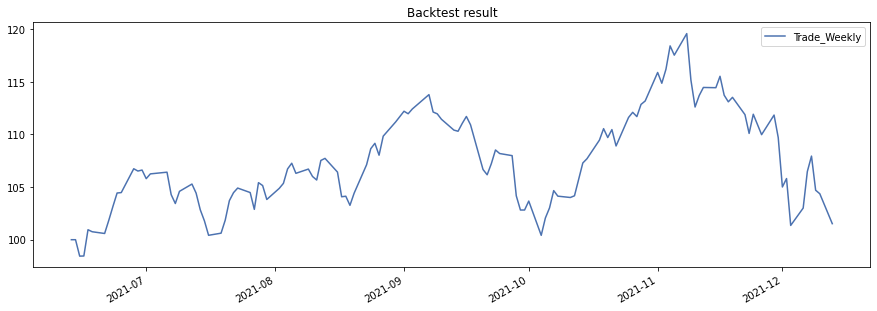

In [ ]:
import bt

# Download historical prices
bt_data = bt.get(stocks, start='2021-6-14', end='2021-12-14')

# Define the strategy
bt_strategy = bt.Strategy('Trade_Weekly', 
                         [bt.algos.RunWeekly(),
                          bt.algos.SelectAll(),
                          bt.algos.WeighEqually(),
                          bt.algos.Rebalance()])
# Create a backtest
bt_test = bt.Backtest(bt_strategy, bt_data)
# Run the backtest
bt_res = bt.run(bt_test)
# Plot the test result
bt_res.plot(title="Backtest result")
plt.show()

In [ ]:
bt_res.display()

Stat                 Trade_Weekly
-------------------  --------------
Start                2021-06-13
End                  2021-12-13
Risk-free rate       0.00%

Total Return         1.52%
Daily Sharpe         0.24
Daily Sortino        0.37
CAGR                 3.06%
Max Drawdown         -15.24%
Calmar Ratio         0.20

MTD                  -7.46%
3m                   -8.05%
6m                   1.52%
YTD                  1.52%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  3.06%

Daily Sharpe         0.24
Daily Sortino        0.37
Daily Mean (ann.)    5.72%
Daily Vol (ann.)     23.42%
Daily Skew           -0.66
Daily Kurt           0.58
Best Day             3.37%
Worst Day            -4.28%

Monthly Sharpe       -0.26
Monthly Sortino      -0.57
Monthly Mean (ann.)  -6.87%
Monthly Vol (ann.)   26.49%
Monthly Skew         0.67
Monthly Kurt         -1.63
Best Month           10.07%
Worst Month          -7.95%

Yearly Sha

Here we use equall weighted method as a benchmark in order to compare the performance with other weighted we gained before. It seems not a good combination. Since the return, sharpe ratio and sortino ratio are all pretty small.

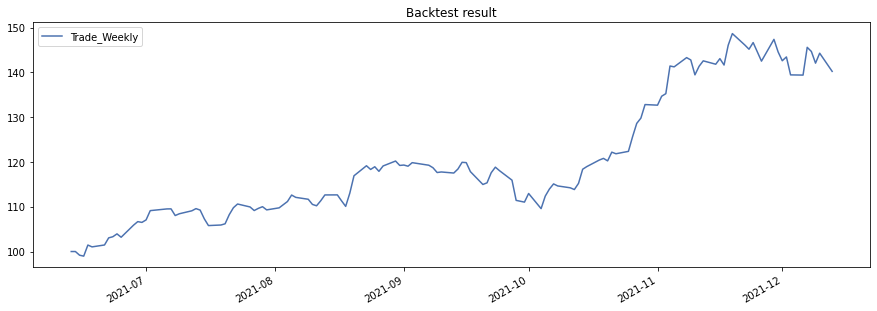

In [ ]:
import bt

# Download historical prices
bt_data = bt.get(stocks, start='2021-6-14', end='2021-12-14')

# Define the strategy
bt_strategy = bt.Strategy('Trade_Weekly', 
                         [bt.algos.RunWeekly(),
                          bt.algos.SelectAll(),
                          bt.algos.WeighSpecified(msft=0.66455, nvda=0.33545),
                          bt.algos.Rebalance()])
# Create a backtest
bt_test = bt.Backtest(bt_strategy, bt_data)
# Run the backtest
bt_res = bt.run(bt_test)
# Plot the test result
bt_res.plot(title="Backtest result")
plt.show()

In [ ]:
bt_res.display()

Stat                 Trade_Weekly
-------------------  --------------
Start                2021-06-13
End                  2021-12-13
Risk-free rate       0.00%

Total Return         40.22%
Daily Sharpe         2.96
Daily Sortino        5.72
CAGR                 96.33%
Max Drawdown         -8.84%
Calmar Ratio         10.90

MTD                  -3.01%
3m                   19.31%
6m                   40.22%
YTD                  40.22%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  96.33%

Daily Sharpe         2.96
Daily Sortino        5.72
Daily Mean (ann.)    69.34%
Daily Vol (ann.)     23.39%
Daily Skew           0.13
Daily Kurt           0.67
Best Day             4.56%
Worst Day            -3.89%

Monthly Sharpe       1.83
Monthly Sortino      6.19
Monthly Mean (ann.)  60.59%
Monthly Vol (ann.)   33.07%
Monthly Skew         0.34
Monthly Kurt         -0.36
Best Month           19.61%
Worst Month          -6.87%

Yearly 

This backtest is based on the normal calculated μ and σ. We choose the weight of msft=0.66455 and nvda=0.33545. It turns out to offer us really good results. Total return 40.22%, sharpe ratio is 2.96 and sortino ratio is 5.72. The volitality is lower than the benchmark.

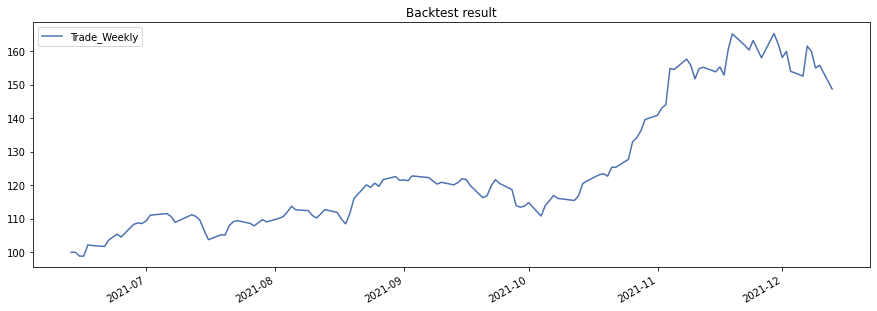

In [ ]:
# Download historical prices
bt_data = bt.get(stocks, start='2021-6-14', end='2021-12-14')

# Define the strategy
bt_strategy = bt.Strategy('Trade_Weekly', 
                         [bt.algos.RunWeekly(),
                          bt.algos.SelectAll(),
                          bt.algos.WeighSpecified(msft=0.34813, nvda=0.58744, tsla=0.06443),
                          bt.algos.Rebalance()])
# Create a backtest
bt_test = bt.Backtest(bt_strategy, bt_data)
# Run the backtest
bt_res = bt.run(bt_test)
# Plot the test result
bt_res.plot(title="Backtest result")
plt.show()

In [ ]:
bt_res.display()

Stat                 Trade_Weekly
-------------------  --------------
Start                2021-06-13
End                  2021-12-13
Risk-free rate       0.00%

Total Return         48.69%
Daily Sharpe         2.69
Daily Sortino        5.41
CAGR                 120.72%
Max Drawdown         -10.01%
Calmar Ratio         12.07

MTD                  -8.34%
3m                   23.81%
6m                   48.69%
YTD                  48.69%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  120.72%

Daily Sharpe         2.69
Daily Sortino        5.41
Daily Mean (ann.)    82.87%
Daily Vol (ann.)     30.75%
Daily Skew           0.46
Daily Kurt           1.40
Best Day             7.46%
Worst Day            -4.54%

Monthly Sharpe       1.64
Monthly Sortino      5.41
Monthly Mean (ann.)  72.08%
Monthly Vol (ann.)   43.85%
Monthly Skew         0.13
Monthly Kurt         -1.99
Best Month           22.72%
Worst Month          -8.34%

Year

The above chart and table are calculated by using the exponential weighted μ and σ. It also turns out to give us good results. This time the total return is higher than the previous one and it is near 50%. However, the sharpe ratio and sortino ratio are slightly lower than the previous one.

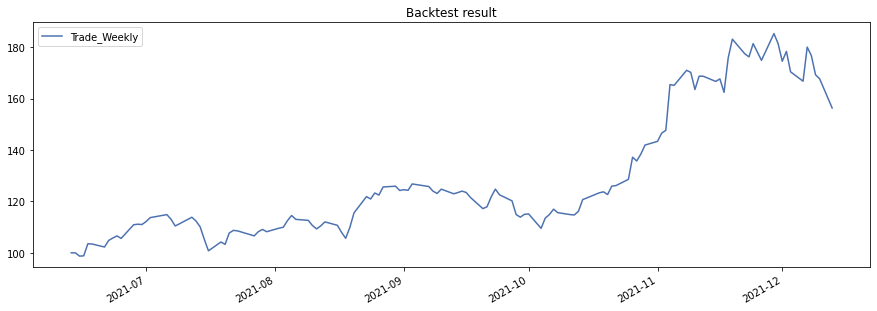

In [ ]:
# Download historical prices
bt_data = bt.get(stocks, start='2021-6-14', end='2021-12-14')

# Define the strategy
bt_strategy = bt.Strategy('Trade_Weekly', 
                         [bt.algos.RunWeekly(),
                          bt.algos.SelectAll(),
                          bt.algos.WeighSpecified(nvda=1),
                          bt.algos.Rebalance()])
# Create a backtest
bt_test = bt.Backtest(bt_strategy, bt_data)
# Run the backtest
bt_res = bt.run(bt_test)
# Plot the test result
bt_res.plot(title="Backtest result")
plt.show()

In [ ]:
bt_res.display()

Stat                 Trade_Weekly
-------------------  --------------
Start                2021-06-13
End                  2021-12-13
Risk-free rate       0.00%

Total Return         56.33%
Daily Sharpe         2.20
Daily Sortino        4.61
CAGR                 143.94%
Max Drawdown         -15.61%
Calmar Ratio         9.22

MTD                  -13.81%
3m                   27.14%
6m                   56.33%
YTD                  56.33%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  143.94%

Daily Sharpe         2.20
Daily Sortino        4.61
Daily Mean (ann.)    97.71%
Daily Vol (ann.)     44.35%
Daily Skew           0.79
Daily Kurt           2.26
Best Day             12.04%
Worst Day            -6.75%

Monthly Sharpe       1.41
Monthly Sortino      4.34
Monthly Mean (ann.)  84.52%
Monthly Vol (ann.)   59.92%
Monthly Skew         0.05
Monthly Kurt         -2.32
Best Month           27.80%
Worst Month          -13.81%

Ye

In this case, we use exponential weighted μ and semi-covariance to conduct the backtest. Although the total return is the highest amoung all other combination. The volitality is also highest amoung the others and it is even worse than the benchmark. Since it just pick nvda as our only target asset.

##Conclusion
According to modern portfolio theory, pioneered by Harry Markowitz in 1952, there is an efficient frontier of portfolios, each with the highest expected return for a given level of risk. We select the tangency portfolio, which is the portfolio with the highest Sharpe ratio. The tangency portfolio is known as the max sharpe ratio, or MSR portfolio.

We pick the stock by using sentiment analysis for the largest finance communities in Reddit. Then, we set the equal weighted stocks as our benchmark and the performance is relatively poor. However, MSR portfolio turn out to have obviously better results by different μ and σ. MSR portfolio by using exponental weighted μ and σ should become a ideal portfolio. Since it has higher total return and lower volitality compared with other two portfolios.

Since our report is based on the short-term information, so it is crucial to rerun the code every week in order to detect the new hottest stock in the market and make the new portfolios.



